In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

I use "test" to refer to a trial within each experiment instance. I use "trial" to refer to an experiment instance. I ran 10 trials of the experiment,each with 10 tests (blue v. orange/ f v. j) presented. 

In [2]:
path_base = 'data/trial_'
num_trials = 10
agg_data = []
for file_num in range(1,num_trials+1):
    path = path_base + str(file_num) + '.csv'
    data = pd.read_csv(path, header=0)
    response_data = data[data['task'] == 'response']
    response_data = response_data.loc[:,['time_elapsed','rt','response','correct_response','correct']]
    agg_data.append(response_data)

tests_per_trial = len(agg_data[0].loc[:,'rt'])

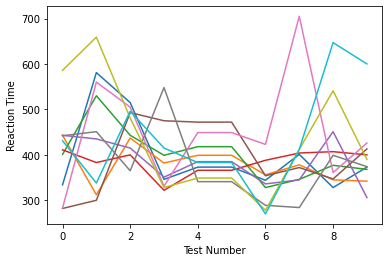

In [8]:
rts = np.empty([num_trials, tests_per_trial])
correct_rts = []
incorr_rts = []
color_trials = np.empty([num_trials, tests_per_trial])

for i in range(num_trials):
    data = agg_data[i]
    
    rts[i,:] = np.asarray(data.loc[:,'rt'])
    color_trials[i,:] = np.asarray(data.loc[:,'correct_response']=='j') #f = 0 = blue, j = 1 = orange
    correct_trials = data[data['correct']]
    incorr_trials = data[data['correct'] == False]
    correct_rts += list(correct_trials.loc[:,'rt'])
    incorr_rts += list(incorr_trials.loc[:,'rt'])

plt.figure()
plt.subplot(121)
plt.plot(rts)
plt.xlabel('Test Number')
plt.ylabel('Reaction Time')
plt.show('Changes in Reaction Time over Time for Each Trial')
plt.subplot(122)
plt.plto





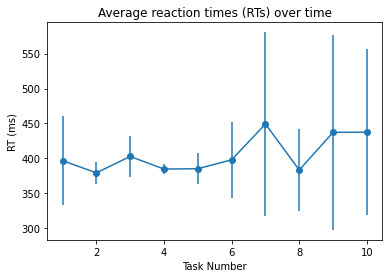

In [4]:
# reaction times over time (w error bars)
rt_means = np.mean(rts,0)
rt_vars = np.var(rts,0)/100

plt.errorbar(x=np.arange(1,num_trials+1),y=rt_means, yerr=rt_vars, fmt='-o', barsabove=True)
plt.title('Average reaction times (RTs) over time')
plt.xlabel('Task Number')
plt.ylabel('RT (ms)')
plt.show()

In [5]:
# Response time vs Accuracy 
mean_rts = np.mean(rts, 0)
accuracies = 

SyntaxError: invalid syntax (<ipython-input-5-40e3f022ae8f>, line 3)

Error bars are scaled by a magnitude of 1/100 to visually accomodate for large variances. 

## write something ## 

In [ ]:
# true vs false avg rxn time (w error bars )
tf_means = [np.mean(np.asarray(correct_rts)), np.mean(np.asarray(incorr_rts))]
tf_vars = [np.var(np.asarray(correct_rts)), np.var(np.asarray(incorr_rts))]
plt.errorbar(x=np.arange(2), y=tf_means, yerr=tf_vars, fmt='o')
plt.xticks(ticks = np.arange(2),labels=['Correct','Incorrect'])
plt.xlabel('Response accuracy')
plt.title('Reaction times(RTs) for Correct vs. Incorrect Responses')
plt.ylabel('RT (ms)')
plt.xlim([-0.5,1.5])
plt.show()

In [ ]:
# reaction times for orange vs blue (RH v LH)
orange_rts = 
blue_rts = 
# rseponse time vs accuracy - scatter 


# Modified Experiment # 

Continuous performance test - seeing accuracy and response times for rare stimuli amongst continuous 

In [ ]:
path_base = 'data_CPT/trial_'
num_trials = 10
agg_data = []
for file_num in range(1,num_trials+1):
    path = path_base + str(file_num) + '.csv'
    data = pd.read_csv(path, header=0)
    response_data = data[data['task'] == 'response']
    response_data = response_data.loc[:,['time_elapsed','rt','response','correct_response','correct']]
    agg_data.append(response_data)

tests_per_trial = len(agg_data[0].loc[:,'rt'])

In [ ]:
# avg response time vs accuracy for rare stimuli 
# response time vs accuracy 
# avg response time for rare stimuli vs continuous stimuli 
num_rare_per_trial = 5
# for i in range(num_trials):
#     data = agg_data[i]
    
#     rts[i,:] = np.asarray(data.loc[:,'rt'])
#     color_trials[i,:] = np.asarray(data.loc[:,'correct_response']=='j') #f = 0 = blue, j = 1 = orange
#     correct_trials = data[data['correct']]
#     incorr_trials = data[data['correct'] == False]
#     correct_rts += list(correct_trials.loc[:,'rt'])
#     incorr_rts += list(incorr_trials.loc[:,'rt'])

accuracies_rare = []
rts = np.empty([num_trials, tests_per_trial])
rts_rare = np.empty([num_trials, num_rare_per_trial])
for i in range(num_trials):
    data = agg_data[i]
    rare_stimuli = data[data['correct_response'] == 'j']
    num_correct = np.sum(np.asarray(data.loc[:,'correct']))
    accuracies.append(num_correct/tests_per_trial)
    num_correct_rare = np.sum(np.asarray(rare_stimuli.loc[:,'correct']))
    accuracies_rare.append(num_correct_rare/5)
    rts[i,:] = np.asarray(data.loc[:,'rt'])
    rts_rare[i,:] = np.asarray(rare_stimuli.loc[:,'rt'])
    
    
plt.figure()
mean_rts = np.mean(rts,1)
mean_rt_vars = np.var(rts,1)/2000
idx_sort = np.argsort(mean_rts)
mean_rts = mean_rts[idx_sort]
accuracies_rare = np.asarray(accuracies_rare)
accuracies_rare = accuracies_rare[idx_sort]
plt.errorbar(x=mean_rts, y=accuracies_rare, xerr=mean_rt_vars, fmt='o')
plt.plot(mean_rts, accuracies_rare)
plt.title('Average Response Time (RT) for All Stimuli vs. Accuracy for Rare Stimuli')
plt.xlabel('Average RT(ms) (all stimuli)')
plt.ylabel('Accuracy (rare stimuli only)')
plt.show()

# avg response time for rare stimuli vs continuous stimuli 

Each point represents a trial.

In [ ]:
print(np.sum(np.asarray(agg_data[i].loc[:,'correct'])))